In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib  # To save the model



In [2]:
# Load dataset
df = pd.read_csv("../data/ship_fuel_efficiency.csv")





In [3]:
# Encode categorical columns
label_cols = ['ship_type', 'fuel_type', 'weather_conditions', 'month']
df_encoded = df.copy()
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])


In [4]:
# Define features and target
features = ['ship_type', 'month', 'distance', 'fuel_type', 'weather_conditions', 'engine_efficiency']
X = df_encoded[features]
y = df_encoded['fuel_consumption']

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae:.2f}\nR² Score: {r2:.2f}")

Model Evaluation:
MAE: 644.49
R² Score: 0.95


In [8]:
import joblib  # To save the model
joblib.dump(model, "../model/ship_fuel_model.pkl")
print("✅ Model saved to: model/ship_fuel_model.pkl")

✅ Model saved to: model/ship_fuel_model.pkl


In [9]:
import pandas as pd

df_ais = pd.read_csv("../data/ais_stream_output.csv")
df_ais.head()


,timestamp,mmsi,latitude,longitude,sog,cog,true_heading,navigational_status
0,2025-05-10 16:31:32.290865903 +0000 UTC,367625810,33.739778,-118.277988,0.0,310.2,10,0
1,2025-05-10 16:31:33.085881964 +0000 UTC,366921510,33.731023,-118.261288,0.0,180.0,253,5
2,2025-05-10 16:31:33.479082681 +0000 UTC,477737600,33.743757,-118.194630,0.0,177.8,90,5
3,2025-05-10 16:31:33.825590985 +0000 UTC,367461940,33.744360,-118.225540,0.1,295.4,511,3
4,2025-05-10 16:31:34.303758713 +0000 UTC,366926740,33.728317,-118.274350,0.0,43.9,306,0


In [17]:
# Step 1: Make sure the column is treated as string
df_ais["timestamp"] = df_ais["timestamp"].astype(str)

# Step 2: Remove the ' +0000 UTC' part
df_ais["timestamp"] = df_ais["timestamp"].str.replace(" +0000 UTC", "", regex=False)

# Step 3: Convert to datetime
df_ais["timestamp"] = pd.to_datetime(df_ais["timestamp"])

df_ais.info()
df_ais.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            166 non-null    datetime64[ns]
 1   mmsi                 166 non-null    int64         
 2   latitude             166 non-null    float64       
 3   longitude            166 non-null    float64       
 4   sog                  166 non-null    float64       
 5   cog                  166 non-null    float64       
 6   true_heading         166 non-null    int64         
 7   navigational_status  166 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 10.5 KB


,timestamp,mmsi,latitude,longitude,sog,cog,true_heading,navigational_status
0,2025-05-10 16:31:32.290865903,367625810,33.739778,-118.277988,0.0,310.2,10,0
1,2025-05-10 16:31:33.085881964,366921510,33.731023,-118.261288,0.0,180.0,253,5
2,2025-05-10 16:31:33.479082681,477737600,33.743757,-118.194630,0.0,177.8,90,5
3,2025-05-10 16:31:33.825590985,367461940,33.744360,-118.225540,0.1,295.4,511,3
4,2025-05-10 16:31:34.303758713,366926740,33.728317,-118.274350,0.0,43.9,306,0


In [18]:
grouped = df_ais.groupby("mmsi")

summary = grouped.agg({
    "sog": ["mean", "max"],
    "timestamp": ["min", "max"],
    "latitude": "first",
    "longitude": "first"
}).reset_index()

# Flatten column names
summary.columns = ["mmsi", "avg_sog", "max_sog", "start_time", "end_time", "start_lat", "start_lon"]

# Calculate trip duration in minutes
summary["trip_duration_min"] = (summary["end_time"] - summary["start_time"]).dt.total_seconds() / 60
summary.head(10)


,mmsi,avg_sog,max_sog,start_time,end_time,start_lat,start_lon,trip_duration_min
0,220415000,0.000000,0.0,2025-05-10 16:31:42.164094958,2025-05-10 16:31:42.164094958,33.731618,-118.249783,0.000000
1,235050012,0.000000,0.0,2025-05-10 16:32:15.441119990,2025-05-10 16:32:15.441119990,33.762917,-118.248783,0.000000
2,235103357,0.000000,0.0,2025-05-10 16:33:59.294585459,2025-05-10 16:33:59.294585459,33.745823,-118.275288,0.000000
3,241529000,0.100000,0.1,2025-05-10 16:32:10.721055904,2025-05-10 16:32:10.721055904,33.734130,-118.169355,0.000000
4,256843000,0.000000,0.0,2025-05-10 16:32:27.627095753,2025-05-10 16:32:27.627095753,33.755090,-118.276160,0.000000
5,308369000,0.000000,0.0,2025-05-10 16:33:20.759522802,2025-05-10 16:33:20.759522802,33.745952,-118.211470,0.000000
6,311001627,2.233333,2.6,2025-05-10 16:31:54.781442361,2025-05-10 16:33:05.426092429,33.729613,-118.222873,1.177411
7,338140889,0.000000,0.0,2025-05-10 16:31:49.367403136,2025-05-10 16:33:58.361604804,33.770015,-118.212385,2.149903
8,338145691,0.133333,0.2,2025-05-10 16:31:47.786163246,2025-05-10 16:33:28.809974617,33.726265,-118.269072,1.683730
9,338525791,0.000000,0.0,2025-05-10 16:32:49.485845996,2025-05-10 16:32:49.485845996,33.771108,-118.213838,0.000000


In [19]:
from math import radians, cos, sin, asin, sqrt

# Get end position from the AIS data
last_pos = df_ais.groupby("mmsi")[["latitude", "longitude"]].last().reset_index()
last_pos.columns = ["mmsi", "end_lat", "end_lon"]

# Merge start and end positions
summary = summary.merge(last_pos, on="mmsi", how="left")

# Haversine formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Earth radius in km
    return c * r

# Apply Haversine calculation
summary["estimated_distance_km"] = summary.apply(
    lambda row: haversine(row["start_lat"], row["start_lon"], row["end_lat"], row["end_lon"]),
    axis=1
)

summary.head()


,mmsi,avg_sog,max_sog,start_time,end_time,start_lat,start_lon,trip_duration_min,end_lat,end_lon,estimated_distance_km
0,220415000,0.0,0.0,2025-05-10 16:31:42.164094958,2025-05-10 16:31:42.164094958,33.731618,-118.249783,0.0,33.731618,-118.249783,0.0
1,235050012,0.0,0.0,2025-05-10 16:32:15.441119990,2025-05-10 16:32:15.441119990,33.762917,-118.248783,0.0,33.762917,-118.248783,0.0
2,235103357,0.0,0.0,2025-05-10 16:33:59.294585459,2025-05-10 16:33:59.294585459,33.745823,-118.275288,0.0,33.745823,-118.275288,0.0
3,241529000,0.1,0.1,2025-05-10 16:32:10.721055904,2025-05-10 16:32:10.721055904,33.734130,-118.169355,0.0,33.734130,-118.169355,0.0
4,256843000,0.0,0.0,2025-05-10 16:32:27.627095753,2025-05-10 16:32:27.627095753,33.755090,-118.276160,0.0,33.755090,-118.276160,0.0


In [25]:
df_ais["month"] = df_ais["timestamp"].dt.strftime("%B")


In [30]:
# Extract month from timestamp again just in case
df_ais["month"] = df_ais["timestamp"].dt.strftime("%B")

# Flag idle status (speed < 2 knots)
df_ais["is_idle"] = df_ais["sog"] < 2.0

# Create summary stats by month
monthly_ais_summary = df_ais.groupby("month").agg({
    "sog": ["mean", "std"],
    "is_idle": "mean",
    "timestamp": lambda x: (x.max() - x.min()).total_seconds() / 60,
    "latitude": ["first", "last"],
    "longitude": ["first", "last"],
    "mmsi": "count"
}).reset_index()

# Flatten column names
monthly_ais_summary.columns = [
    "month", "avg_sog", "speed_std", "idle_time_pct", "trip_duration_min",
    "start_lat", "end_lat", "start_lon", "end_lon", "num_position_reports"
]



In [31]:
# Haversine function stays the same
from math import radians, sin, cos, sqrt, asin

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    return 6371 * c

# Add distance
monthly_ais_summary["estimated_distance_km"] = monthly_ais_summary.apply(
    lambda row: haversine(row["start_lat"], row["start_lon"], row["end_lat"], row["end_lon"]),
    axis=1
)



In [32]:
df_fuel = pd.read_csv("../data/ship_fuel_efficiency.csv")
merged = df_fuel.merge(monthly_ais_summary, on="month", how="left")
merged.to_csv("../data/merged_fuel_ais_enhanced.csv", index=False)



In [29]:
df = pd.read_csv("C:/Users/evapa.EVAPATSBITCES/ship_fuel_model/data/merged_fuel_ais_by_month.csv")


In [33]:
import shap

# Initialize SHAP explainer for your trained Random Forest model
explainer = shap.TreeExplainer(model)

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test)


c:\Users\evapa.EVAPATSBITCES\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


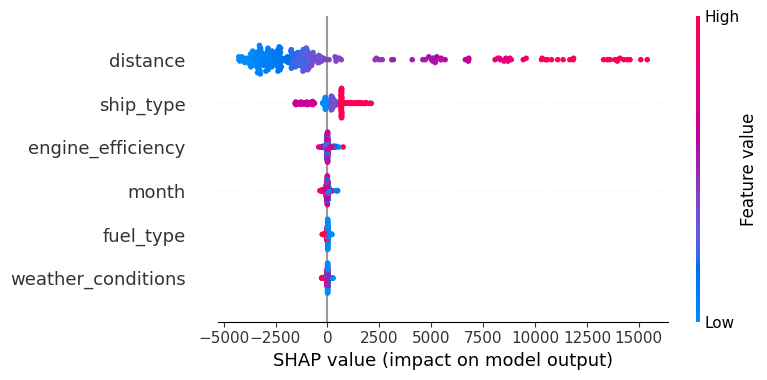

In [34]:
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [35]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])
